In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('Leads.csv')

In [3]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


# Data Cleaning

In [7]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
df.shape

(9240, 37)

In [9]:
for col in df.columns:
    if df[col].isnull().sum()>3000:
        df.drop(col,axis=1,inplace=True)

In [10]:
df.shape

(9240, 31)

In [11]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
df.drop(['City','Country'],axis=1,inplace=True)

In [13]:
round(df.isna().sum()/df.shape[0]*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [14]:
for column in df:
    print(df[column].astype('category').value_counts())
    print('-------------------------------------------')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
-------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
-------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------

In [15]:
df['How did you hear about X Education'].astype('category').value_counts()


Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [16]:
df.drop(['Lead Profile','How did you hear about X Education'],axis=1,inplace=True)

In [17]:
df.shape

(9240, 27)

In [18]:
df.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [19]:
df.shape

(9240, 15)

In [20]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [21]:
df.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

In [22]:
df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [23]:
#drop all null values from 'What is your current occupation'
#''~'' nuggate means false will be converted to true and vice versa
df=df[~pd.isnull(df['What is your current occupation'])]

In [24]:
df.isna().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [25]:
df=df[~pd.isnull(df['TotalVisits'])]

In [26]:
df.isna().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [27]:
df=df[~pd.isnull(df['Lead Source'])]

In [28]:
df.isna().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [29]:
df=df[~pd.isnull(df['Specialization'])] 

In [30]:
df.isna().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [31]:
df.shape[0]

6373

In [32]:
#it means that 68% of rows we have retained
df.shape[0]/9240

0.6897186147186147

In [33]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [34]:
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [35]:
df.head(10)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website
12,API,Organic Search,No,1,11.0,1538,11.00,Email Opened,Marketing Management,Unemployed,No,Modified
13,Landing Page Submission,Organic Search,No,0,5.0,170,5.00,Email Opened,Business Administration,Unemployed,Yes,Email Opened


In [36]:
df.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [37]:
#select only columns containing only objects
temp = df.loc[:,df.dtypes=='object']

In [38]:
temp.columns


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

In [40]:
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9235,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
df = pd.concat([df,dummy],axis=1)

In [42]:
df.dtypes

Lead Origin                                            object
Lead Source                                            object
Do Not Email                                           object
Converted                                               int64
TotalVisits                                           float64
                                                       ...   
Last Notable Activity_Page Visited on Website           uint8
Last Notable Activity_SMS Sent                          uint8
Last Notable Activity_Unreachable                       uint8
Last Notable Activity_Unsubscribed                      uint8
Last Notable Activity_View in browser link Clicked      uint8
Length: 83, dtype: object

In [43]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [44]:
df=df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)

In [45]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [46]:
(df.dtypes=='object').sum()

0

In [47]:
X=df.drop(['Converted'],axis=1)

In [48]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
X.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olar

In [50]:
y=df['Converted']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1000,stratify=y)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

<ipython-input-53-0ab1fcb8e636>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
D:\python\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [54]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6716,0.011952,0.147447,0.054545,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4348,0.011952,0.554137,0.054545,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
532,0.011952,0.102113,0.054545,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6266,0.035857,0.546215,0.054545,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1637,0.000000,0.000000,0.000000,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.linear_model import LogisticRegression


In [56]:
logreg = LogisticRegression()

In [57]:
from sklearn.feature_selection import RFE

In [58]:
rfe = RFE(logreg,15)

D:\python\Anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [59]:
rfe.fit(X_train,y_train)

D:\python\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\python\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_o

D:\python\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\python\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_o

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [60]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 47),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Live Chat', False, 29),
 ('Lead Source_Olark Chat', False, 17),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Pay per Click Ads', False, 25),
 ('Lead Source_Press_Release', False, 58),
 ('Lead Source_Reference', False, 18),
 ('Lead Source_Referral Sites', False, 5),
 ('Lead Source_Social Media', False, 38),
 ('Lead Source_WeLearn', False, 60),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 50),
 ('Lead Source_testone', False, 59),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Cli

In [61]:
col = X_train.columns[rfe.support_]

In [62]:
X_train = X_train[col]

In [63]:
import statsmodels.api as sm

In [64]:
X_train_sm = sm.add_constant(X_train)

In [65]:
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

In [66]:
res = logm2.fit()

In [67]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2105.7
Date:                Sat, 23 Jan 2021   Deviance:                       4211.5
Time:                        16:53:32   Pearson chi2:                 4.66e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0505      0.092     -0.549      0.583      -0.231       0.130
Total Time Spent on Website                              3.6698      0.169     21.694      0.000       3.338       4.001
Page Views Per Visit                                    -7.2698      1.146     -6.342      0.000      -9.517      -5.023
Lead Origin_Lead Add Form                                2.9881      0.236     12.665      0.000       2.526       3.450
Lead Source_Welingak Website                             2.2643      1.034      2.191      0.028       0.239       4.290
Do Not Email_Yes                                        -1.7642      0.194     -9.086      0.000      -2.145      -1.384
Last Activity_Converted to Lead                         -1.3880      0.239     -5.799      0.000      -1.857      -0.919
Last Activity_Olark Chat Conversation                   -1.2189      0.194     -6.287      0.000      -1.599      -0.839
Last Activity_Page Visited on Website                   -1.0032      0.164     -6.100      0.000      -1.325      -0.681
What is your current occupation_Housewife               22.9629   2.24e+04      0.001      0.999   -4.38e+04    4.39e+04
What is your current occupation_Working Professional     2.4711      0.188     13.116      0.000       2.102       2.840
Last Notable Activity_Email Link Clicked                -1.2156      0.290     -4.192      0.000      -1.784      -0.647
Last Notable Activity_Email Opened                      -1.0069      0.093    -10.807      0.000      -1.190      -0.824
Last Notable Activity_Had a Phone Conversation          21.9899   1.35e+04      0.002      0.999   -2.64e+04    2.65e+04
Last Notable Activity_Modified                          -1.1978      0.105    -11.448      0.000      -1.403      -0.993
Last Notable Activity_Unreachable                        2.0404      1.056      1.931      0.053      -0.030       4.111
========================================================================================================================
"""

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif = pd.DataFrame()

In [70]:
vif['Features'] = X_train.columns

In [71]:
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,Total Time Spent on Website,2.0
1,Page Views Per Visit,2.0
13,Last Notable Activity_Modified,2.0
2,Lead Origin_Lead Add Form,1.0
3,Lead Source_Welingak Website,1.0
4,Do Not Email_Yes,1.0
5,Last Activity_Converted to Lead,1.0
6,Last Activity_Olark Chat Conversation,1.0
7,Last Activity_Page Visited on Website,1.0
8,What is your current occupation_Housewife,1.0


In [72]:
X_train.drop(['What is your current occupation_Housewife'],axis=1,inplace=True)

In [73]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())

In [74]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2109.4
Date:                Sat, 23 Jan 2021   Deviance:                       4218.8
Time:                        17:00:08   Pearson chi2:                 4.66e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0491      0.092     -0.533      0.594      -0.230       0.131
Total Time Spent on Website                              3.6697      0.169     21.705      0.000       3.338       4.001
Page Views Per Visit                                    -7.2759      1.146     -6.350      0.000      -9.522      -5.030
Lead Origin_Lead Add Form                                2.9830      0.236     12.646      0.000       2.521       3.445
Lead Source_Welingak Website                             2.2654      1.034      2.192      0.028       0.240       4.291
Do Not Email_Yes                                        -1.7669      0.194     -9.104      0.000      -2.147      -1.387
Last Activity_Converted to Lead                         -1.3974      0.239     -5.841      0.000      -1.866      -0.928
Last Activity_Olark Chat Conversation                   -1.2260      0.194     -6.327      0.000      -1.606      -0.846
Last Activity_Page Visited on Website                   -1.0073      0.164     -6.127      0.000      -1.329      -0.685
What is your current occupation_Working Professional     2.4676      0.188     13.099      0.000       2.098       2.837
Last Notable Activity_Email Link Clicked                -1.2163      0.290     -4.195      0.000      -1.785      -0.648
Last Notable Activity_Email Opened                      -1.0036      0.093    -10.778      0.000      -1.186      -0.821
Last Notable Activity_Had a Phone Conversation          21.9886   1.35e+04      0.002      0.999   -2.64e+04    2.65e+04
Last Notable Activity_Modified                          -1.1893      0.104    -11.387      0.000      -1.394      -0.985
Last Notable Activity_Unreachable                        2.0395      1.056      1.930      0.054      -0.031       4.110
========================================================================================================================
"""

In [76]:
X_train.drop(['Last Notable Activity_Had a Phone Conversation'],axis=1,inplace=True)

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,Total Time Spent on Website,2.0
1,Page Views Per Visit,2.0
11,Last Notable Activity_Modified,2.0
2,Lead Origin_Lead Add Form,1.0
3,Lead Source_Welingak Website,1.0
4,Do Not Email_Yes,1.0
5,Last Activity_Converted to Lead,1.0
6,Last Activity_Olark Chat Conversation,1.0
7,Last Activity_Page Visited on Website,1.0
8,What is your current occupation_Working Profes...,1.0


In [87]:
y_train_pred = res.predict(X_train_sm)

In [88]:
y_train_pred[:10]

6716    0.053761
4348    0.640981
532     0.219231
6266    0.635133
1637    0.257801
2686    0.995542
8321    0.222985
5280    0.357244
7508    0.708684
3523    0.102136
dtype: float64

In [89]:
y_train_pred = y_train_pred.values.reshape(-1)

In [90]:
y_train_pred[:10]

array([0.05376086, 0.64098121, 0.21923087, 0.63513257, 0.25780081,
       0.99554214, 0.22298477, 0.35724435, 0.70868371, 0.10213647])

In [91]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'conversion_prob':y_train_pred})

In [92]:
y_train_pred_final.head(10)

,Converted,conversion_prob
0,0,0.053761
1,0,0.640981
2,0,0.219231
3,0,0.635133
4,1,0.257801
5,1,0.995542
6,1,0.222985
7,0,0.357244
8,1,0.708684
9,0,0.102136


In [93]:
y_train_pred_final['predicted'] = y_train_pred_final.conversion_prob.map(lambda x: 1 if x>0.5 else 0)

In [94]:
y_train_pred_final.head()

,Converted,conversion_prob,predicted
0,0,0.053761,0
1,0,0.640981,1
2,0,0.219231,0
3,0,0.635133,1
4,1,0.257801,0


In [96]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)

In [97]:
confusion

array([[1927,  389],
       [ 612, 1533]], dtype=int64)

In [98]:
#predicted     not_converted  converted
#Actual                       
#not_converted    TN            FP
#converted        FN            TP

In [99]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.7756108495852948

In [100]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [101]:
#sensitivity

In [102]:
TP/(TP+FN)

0.7146853146853147

In [103]:
#specificity
TN/(TN+FP)

0.8320379965457686

In [114]:
import matplotlib.pyplot as plt
def draw_roc(actual,prob):
    fpr,tpr,threshold = metrics.roc_curve(actual,prob,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label = 'ROC Curve(area = %0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim(0.0,1.0)
    plt.ylim(0.0,1.05)
    plt.legend(loc = 'lower right')
    plt.show()
    return None

In [115]:
fpr,tpr,threshold=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.conversion_prob)

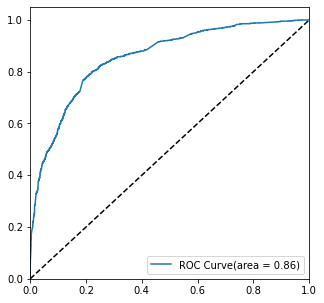

In [116]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.conversion_prob)

In [118]:
number = [float(x)/10 for x in range(10)]

In [119]:
number

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [121]:
for i in number:
    y_train_pred_final[i] = y_train_pred_final.Converted.map(lambda x:1 if x>i else 0)

In [122]:
y_train_pred_final.head(10)

,Converted,conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.053761,0,0,0,0,0,0,0,0,0,0,0
1,0,0.640981,1,0,0,0,0,0,0,0,0,0,0
2,0,0.219231,0,0,0,0,0,0,0,0,0,0,0
3,0,0.635133,1,0,0,0,0,0,0,0,0,0,0
4,1,0.257801,0,1,1,1,1,1,1,1,1,1,1
5,1,0.995542,1,1,1,1,1,1,1,1,1,1,1
6,1,0.222985,0,1,1,1,1,1,1,1,1,1,1
7,0,0.357244,0,0,0,0,0,0,0,0,0,0,0
8,1,0.708684,1,1,1,1,1,1,1,1,1,1,1
9,0,0.102136,0,0,0,0,0,0,0,0,0,0,0


In [123]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])

In [132]:
for i in number:
    cm1=metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])
    total1=sum(cm1)
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = (cm1[0,0])/cm1[0,0]+cm1[0,1]
    sensitivity = (cm1[1,1])/cm1[1,1]+cm1[1,0]
    cutoff_df.loc[i] = [i,accuracy,sensitivity,specificity]

In [133]:
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,"[1.9261658031088082, 2.07972027972028]",1.0,1.0
0.1,0.1,"[1.9261658031088082, 2.07972027972028]",1.0,1.0
0.2,0.2,"[1.9261658031088082, 2.07972027972028]",1.0,1.0
0.3,0.3,"[1.9261658031088082, 2.07972027972028]",1.0,1.0
0.4,0.4,"[1.9261658031088082, 2.07972027972028]",1.0,1.0
0.5,0.5,"[1.9261658031088082, 2.07972027972028]",1.0,1.0
0.6,0.6,"[1.9261658031088082, 2.07972027972028]",1.0,1.0
0.7,0.7,"[1.9261658031088082, 2.07972027972028]",1.0,1.0
0.8,0.8,"[1.9261658031088082, 2.07972027972028]",1.0,1.0
0.9,0.9,"[1.9261658031088082, 2.07972027972028]",1.0,1.0


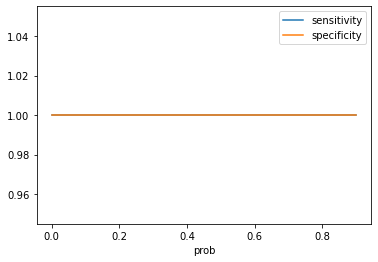

In [136]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensitivity','specificity'])
plt.show()